In [49]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [50]:
file_path = "C:/Users/dell/Downloads/C5 Input for participants/C5 Input for participants/domestic_visitors"
file_list = os.listdir(file_path)

In [51]:
# domestic visitors
df = pd.concat(
    map(pd.read_csv, ['domestic_visitors_2016.csv', 'domestic_visitors_2017.csv', 'domestic_visitors_2018.csv', 'domestic_visitors_2019.csv']), ignore_index=True)
df.to_csv('domestic_visitorscsv', index=False)

output_file_path = os.path.join(file_path, 'domestic_visitors.csv')

if os.path.exists(output_file_path):
    os.remove(output_file_path)

df.to_csv(output_file_path, index=False)

In [52]:
file_path = "C:/Users/dell/Downloads/C5 Input for participants/C5 Input for participants/foreign_visitors"
file_list = os.listdir(file_path)


In [53]:
#foreign visitors
df_for = pd.concat(
    map(pd.read_csv, ['foreign_visitors_2016.csv', 'foreign_visitors_2017.csv', 'foreign_visitors_2018.csv', 'foreign_visitors_2019.csv']), ignore_index=True)
df_for.to_csv('foreign_visitors.csv', index=False)

output_file_path = os.path.join(file_path, 'foreign_visitors.csv')
if os.path.exists(output_file_path):
    os.remove(output_file_path)
df_for.to_csv(output_file_path, index=False)


In [54]:
df.head(5)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


In [55]:
df_for.nunique()

district     33
date         48
month        12
year          4
visitors    151
dtype: int64

In [56]:
df_for.district.unique()

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy ', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanpet'],
      dtype=object)

In [57]:
df_for.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [58]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df_for['month'] = df_for['month'].map(month_mapping)

In [59]:
df_for

,district,date,month,year,visitors
0,Adilabad,01-01-2016,1,2016,2
1,Adilabad,01-02-2016,2,2016,0
2,Adilabad,01-03-2016,3,2016,2
3,Adilabad,01-04-2016,4,2016,0
4,Adilabad,01-05-2016,5,2016,0
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,8,2019,0
1508,Yadadri Bhongir,01-09-2019,9,2019,0
1509,Yadadri Bhongir,01-10-2019,10,2019,0
1510,Yadadri Bhongir,01-11-2019,11,2019,0


In [60]:
df_for['month']= df_for['month'].astype(int)

In [61]:
df_for['visitors'].isnull().sum()

0

In [62]:
df_for['date']=df_for['date'].str.split('-').str[0]

In [63]:
df_for

,district,date,month,year,visitors
0,Adilabad,01,1,2016,2
1,Adilabad,01,2,2016,0
2,Adilabad,01,3,2016,2
3,Adilabad,01,4,2016,0
4,Adilabad,01,5,2016,0
...,...,...,...,...,...
1507,Yadadri Bhongir,01,8,2019,0
1508,Yadadri Bhongir,01,9,2019,0
1509,Yadadri Bhongir,01,10,2019,0
1510,Yadadri Bhongir,01,11,2019,0


In [64]:
df_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   int32 
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 53.3+ KB


In [65]:
df_for['visitors'] = pd.to_numeric(df_for['visitors'], errors='coerce', downcast='integer')

df_for['visitors'].fillna(0, inplace=True)

df_for

,district,date,month,year,visitors
0,Adilabad,01,1,2016,2.0
1,Adilabad,01,2,2016,0.0
2,Adilabad,01,3,2016,2.0
3,Adilabad,01,4,2016,0.0
4,Adilabad,01,5,2016,0.0
...,...,...,...,...,...
1507,Yadadri Bhongir,01,8,2019,0.0
1508,Yadadri Bhongir,01,9,2019,0.0
1509,Yadadri Bhongir,01,10,2019,0.0
1510,Yadadri Bhongir,01,11,2019,0.0


In [66]:
df.nunique()

district      33
date          48
month         12
year           4
visitors    1027
dtype: int64

In [67]:
df.district.unique()

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy ', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanapet'],
      dtype=object)

In [68]:
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [69]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['month'] = df['month'].map(month_mapping)


In [70]:
df['month'] = pd.to_numeric(df['month'], errors='coerce', downcast='integer')
df['month'].fillna(0, inplace=True)
df

,district,date,month,year,visitors
0,Adilabad,01-01-2016,1,2016,792136
1,Adilabad,01-02-2016,2,2016,937820
2,Adilabad,01-03-2016,3,2016,582946
3,Adilabad,01-04-2016,4,2016,341948
4,Adilabad,01-05-2016,5,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,8,2019,389010
1508,Yadadri Bhongir,01-09-2019,9,2019,366862
1509,Yadadri Bhongir,01-10-2019,10,2019,381860
1510,Yadadri Bhongir,01-11-2019,11,2019,365990


In [71]:
df['month']= df['month'].astype(int)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   int32 
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 53.3+ KB


In [73]:
df.head(5)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,1,2016,792136
1,Adilabad,01-02-2016,2,2016,937820
2,Adilabad,01-03-2016,3,2016,582946
3,Adilabad,01-04-2016,4,2016,341948
4,Adilabad,01-05-2016,5,2016,252887


In [74]:
df['visitors'].isnull().sum()

30

In [75]:
# Convert the 'MixedColumn' to integer data type
df['visitors'] = pd.to_numeric(df['visitors'], errors='coerce', downcast='integer')
# Fill NaN values (resulting from non-numeric entries) with 0 or any other desired value
df['visitors'].fillna(0, inplace=True)
df

,district,date,month,year,visitors
0,Adilabad,01-01-2016,1,2016,792136.0
1,Adilabad,01-02-2016,2,2016,937820.0
2,Adilabad,01-03-2016,3,2016,582946.0
3,Adilabad,01-04-2016,4,2016,341948.0
4,Adilabad,01-05-2016,5,2016,252887.0
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,8,2019,389010.0
1508,Yadadri Bhongir,01-09-2019,9,2019,366862.0
1509,Yadadri Bhongir,01-10-2019,10,2019,381860.0
1510,Yadadri Bhongir,01-11-2019,11,2019,365990.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1512 non-null   object 
 1   date      1512 non-null   object 
 2   month     1512 non-null   int32  
 3   year      1512 non-null   int64  
 4   visitors  1512 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 53.3+ KB


In [77]:
df['date']=df['date'].str.split('-').str[0]

In [78]:
df

,district,date,month,year,visitors
0,Adilabad,01,1,2016,792136.0
1,Adilabad,01,2,2016,937820.0
2,Adilabad,01,3,2016,582946.0
3,Adilabad,01,4,2016,341948.0
4,Adilabad,01,5,2016,252887.0
...,...,...,...,...,...
1507,Yadadri Bhongir,01,8,2019,389010.0
1508,Yadadri Bhongir,01,9,2019,366862.0
1509,Yadadri Bhongir,01,10,2019,381860.0
1510,Yadadri Bhongir,01,11,2019,365990.0


In [79]:
df["date"]=df['date'].astype(int)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1512 non-null   object 
 1   date      1512 non-null   int32  
 2   month     1512 non-null   int32  
 3   year      1512 non-null   int64  
 4   visitors  1512 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 47.4+ KB


In [81]:
district_visitors = df.groupby('district')

In [82]:
district_visitors.size().sort_values(ascending=False)

district
Adilabad                    48
Bhadradri Kothagudem        48
Warangal (Urban)            48
Warangal (Rural)            48
Wanaparthy                  48
Vikarabad                   48
Suryapet                    48
Siddipet                    48
Sangareddy                  48
Ranga Reddy                 48
Rajanna Sircilla            48
Peddapalli                  48
Nizamabad                   48
Nirmal                      48
Nalgonda                    48
Nagarkurnool                48
Yadadri Bhongir             48
Medchal                     48
Medak                       48
Mancherial                  48
Mahbubnagar                 48
Mahabubabad                 48
Komaram Bheem Asifabad      48
Khammam                     48
Karimnagar                  48
Kamareddy                   48
Jogulamba Gadwal            48
Jayashankar Bhoopalpally    48
Jangaon                     48
Jagtial                     48
Hyderabad                   48
Narayanapet                 12

In [83]:
# top 10 Districts with Highest Number of Visitors
district_visitors = df.groupby('district')['visitors'].sum().reset_index()
sorted_districts = district_visitors.sort_values(by='visitors', ascending=False)
top_10_districts = sorted_districts.head(10)


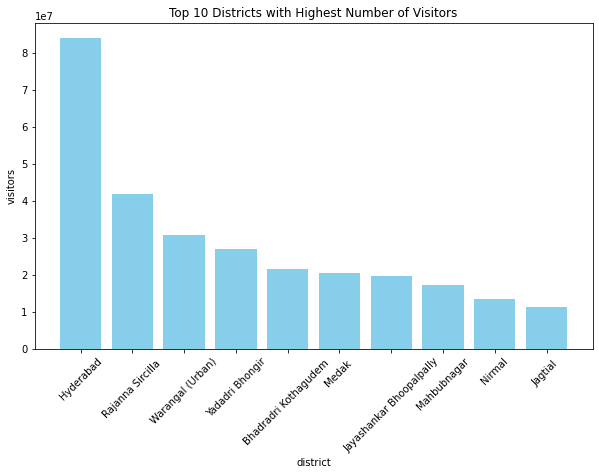

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_districts['district'], top_10_districts['visitors'], color='skyblue')
plt.xlabel('district')
plt.ylabel('visitors')
plt.title('Top 10 Districts with Highest Number of Visitors')
plt.xticks(rotation=45) 
plt.show()

In [85]:
merged_df = pd.merge(df, df_for, on=['district', 'month', 'year'], how='inner')
merged_df.reset_index(drop=True, inplace=True)


In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    1500 non-null   object 
 1   date_x      1500 non-null   int32  
 2   month       1500 non-null   int32  
 3   year        1500 non-null   int64  
 4   visitors_x  1500 non-null   float64
 5   date_y      1500 non-null   object 
 6   visitors_y  1500 non-null   float64
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 70.4+ KB


In [87]:
merged_df['date_y']= merged_df['date_y'].astype(int)

In [88]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    1500 non-null   object 
 1   date_x      1500 non-null   int32  
 2   month       1500 non-null   int32  
 3   year        1500 non-null   int64  
 4   visitors_x  1500 non-null   float64
 5   date_y      1500 non-null   int32  
 6   visitors_y  1500 non-null   float64
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 64.6+ KB


In [89]:
merged_df.rename(columns={'date_x': 'date1', 'date_y': 'date2', 'visitors_x': 'visitors1', 'visitors_y': 'visitors2'}, inplace=True)
grouped = merged_df.groupby('district')

In [90]:
for name, group in grouped:
    print(f"Group Name: {name}")
    print(f"Group Contents:")
    print(group)
    print("**********************")

Group Name: Adilabad
Group Contents:
      district  date1  month  year  visitors1  date2  visitors2
0     Adilabad      1      1  2016   792136.0      1        2.0
1     Adilabad      1      2  2016   937820.0      1        0.0
2     Adilabad      1      3  2016   582946.0      1        2.0
3     Adilabad      1      4  2016   341948.0      1        0.0
4     Adilabad      1      5  2016   252887.0      1        0.0
5     Adilabad      1      6  2016   368237.0      1        0.0
6     Adilabad      1      7  2016   447562.0      1        4.0
7     Adilabad      1      8  2016   614285.0      1        2.0
8     Adilabad      1      9  2016   491279.0      1        0.0
9     Adilabad      1     10  2016    94184.0      1        0.0
10    Adilabad      1     11  2016    99148.0      1        0.0
11    Adilabad      1     12  2016    53125.0      1        0.0
372   Adilabad      1      1  2017   318799.0      1        5.0
373   Adilabad      1      2  2017    83316.0      1        0.0
374

In [91]:
# Group data by 'district' and calculate the sum of domestic and foreign visitors
grouped = merged_df.groupby('district')[['visitors1', 'visitors2']].sum().reset_index()

# Calculate the domestic to foreign visitor ratio
grouped['domestic_to_foreign_ratio'] = grouped['visitors1'] / grouped['visitors2'].replace(0, 1)

# Sort the districts in descending order to find the top 3
top_3_districts = grouped.sort_values(by='domestic_to_foreign_ratio', ascending=False).head(3)


print("Top 3 Districts with Highest Domestic to Foreign Visitor Ratio:")
print(top_3_districts[['district', 'domestic_to_foreign_ratio']])

Top 3 Districts with Highest Domestic to Foreign Visitor Ratio:
                 district  domestic_to_foreign_ratio
22      Rajanna Sircilla                  41763276.0
31        Yadadri Bhongir                 26893080.0
1   Bhadradri Kothagudem                  21600962.0


In [92]:
# Group data by 'district' and calculate the sum of domestic and foreign visitors
grouped = merged_df.groupby('district')[['visitors1', 'visitors2']].sum().reset_index()

# Calculate the domestic to foreign visitor ratio
grouped['domestic_to_foreign_ratio'] = grouped['visitors1'] / grouped['visitors2'].replace(0, 1)

# Sort the districts in descending order to find the top 3
top_3_districts = grouped.sort_values(by='domestic_to_foreign_ratio', ascending=False).head(3)

print("Top 3 Districts with Highest Domestic to Foreign Visitor Ratio:")
print(top_3_districts[['district', 'domestic_to_foreign_ratio']])

Top 3 Districts with Highest Domestic to Foreign Visitor Ratio:
                 district  domestic_to_foreign_ratio
22      Rajanna Sircilla                  41763276.0
31        Yadadri Bhongir                 26893080.0
1   Bhadradri Kothagudem                  21600962.0


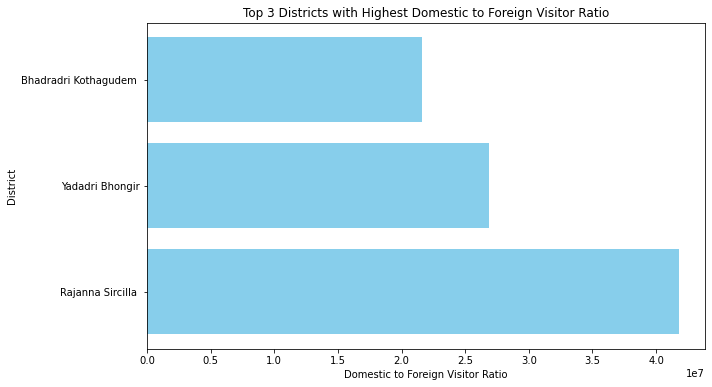

In [94]:
# Plotting the horizontal bar chart for top 3 and bottom 3 districts
plt.figure(figsize=(10, 6))
plt.barh(top_3_districts['district'], top_3_districts['domestic_to_foreign_ratio'], color='skyblue')
plt.xlabel('Domestic to Foreign Visitor Ratio')
plt.ylabel('District')
plt.title('Top 3 Districts with Highest Domestic to Foreign Visitor Ratio')
plt.show()


In [95]:
grouped = merged_df.groupby('district')
cagr_dict = {}
for name, group in grouped:
    # Calculate the CAGR using the formula: CAGR = ((EV / BV)^(1/n)) - 1, avoiding division by zero
    start_value = group['visitors1'].iloc[0]
    end_value = group['visitors1'].iloc[-1]
    num_years = len(group)

    # Avoid division by zero and negative values
    if start_value == 0:
        cagr = 0
    else:
        cagr = ((end_value / start_value) ** (1 / num_years)) - 1

    cagr_dict[name] = cagr

# Create a DataFrame from the CAGR dictionary
cagr_df = pd.DataFrame.from_dict(cagr_dict, orient='index', columns=['CAGR']).reset_index()
cagr_df = cagr_df.rename(columns={'index': 'district'})

# Sort the districts based on CAGR in descending order
cagr_df = cagr_df.sort_values(by='CAGR', ascending=False)

# Select the top 3 districts with the highest CAGR
top_3_districts = cagr_df.head(3)
print(top_3_districts)


     district      CAGR
20  Nizamabad  0.064168
14     Medak   0.028132
2   Hyderabad  0.002699


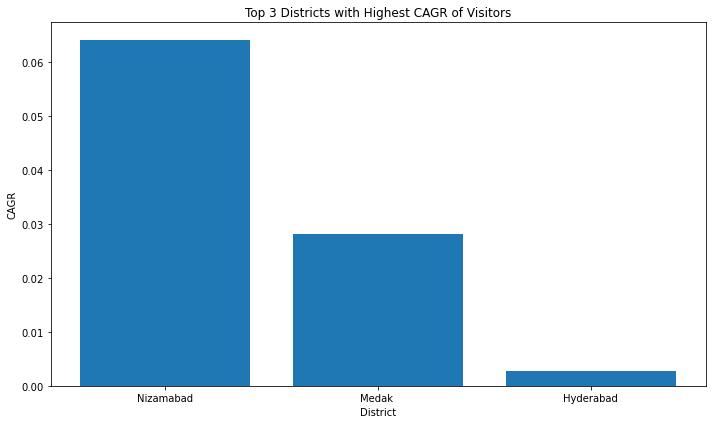

In [109]:
plt.figure(figsize=(10,6))
plt.bar(top_3_districts['district'], top_3_districts['CAGR'])
plt.xlabel('District')
plt.ylabel('CAGR')
plt.title('Top 3 Districts with Highest CAGR of Visitors')
plt.tight_layout()
plt.show()

In [110]:

# Create a DataFrame from the CAGR dictionary
cagr_df = pd.DataFrame(list(cagr_dict.items()), columns=['district', 'CAGR'])

# Sort the districts based on CAGR in descending order
cagr_df = cagr_df.sort_values(by='CAGR', ascending=True)

# Select the top 3 districts with the highest CAGR
bottom_3_districts = cagr_df.head(3)
bottom_3_districts


,district,CAGR
8,Karimnagar,-0.108754
18,Nalgonda,-0.075013
0,Adilabad,-0.061268


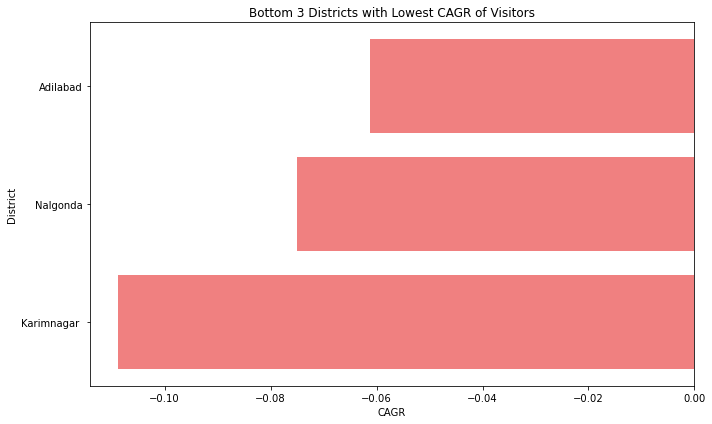

In [111]:
# Sort the DataFrame in ascending order
bottom_3_districts = bottom_3_districts.sort_values('CAGR')

# Plotting the horizontal bar chart with negative CAGR values
plt.figure(figsize=(10, 6))
plt.barh(bottom_3_districts['district'], bottom_3_districts['CAGR'], color='lightcoral')
plt.xlabel('CAGR')
plt.ylabel('District')
plt.title('Bottom 3 Districts with Lowest CAGR of Visitors')
plt.tight_layout()
plt.show()


In [112]:
hyderabad_data = merged_df[merged_df['district'] == 'Hyderabad']

In [113]:
hyderabad_data.head(5)

,district,date1,month,year,visitors1,date2,visitors2
24,Hyderabad,1,1,2016,1122510.0,1,15865.0
25,Hyderabad,1,2,2016,778748.0,1,29646.0
26,Hyderabad,1,3,2016,1017794.0,1,13019.0
27,Hyderabad,1,4,2016,1127738.0,1,8402.0
28,Hyderabad,1,5,2016,1287181.0,1,8522.0


In [114]:
hyderabad_data['total_visitors'] = hyderabad_data['visitors1'] + hyderabad_data['visitors2']

C:\Users\dell\AppData\Local\Temp/ipykernel_8772/266268773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyderabad_data['total_visitors'] = hyderabad_data['visitors1'] + hyderabad_data['visitors2']


In [115]:
monthly_visitors = hyderabad_data.groupby('month')['total_visitors'].sum().reset_index()

In [116]:
monthly_visitors

,month,total_visitors
0,1,6558551.0
1,2,5118208.0
2,3,5303984.0
3,4,6187334.0
4,5,6109590.0
5,6,16965307.0
6,7,5633143.0
7,8,5834736.0
8,9,5406363.0
9,10,6650351.0


In [117]:
highest_month = monthly_visitors.loc[monthly_visitors['total_visitors'].idxmax()]

In [118]:
highest_month

month                    6.0
total_visitors    16965307.0
Name: 5, dtype: float64

In [119]:
lowest_month = monthly_visitors.loc[monthly_visitors['total_visitors'].idxmin()]

In [120]:
lowest_month

month                   2.0
total_visitors    5118208.0
Name: 1, dtype: float64

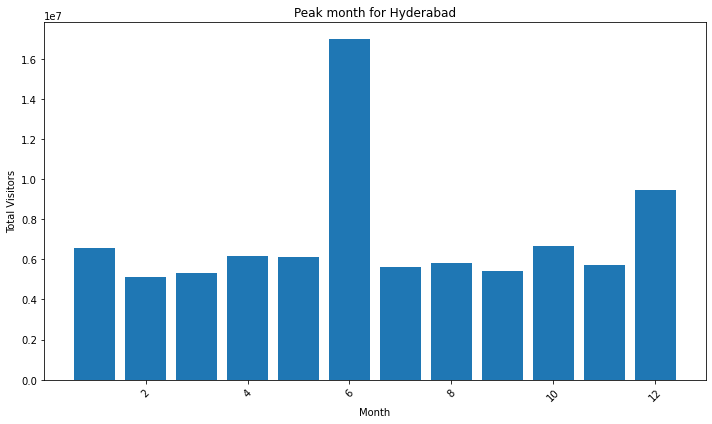

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_visitors['month'], monthly_visitors['total_visitors'])
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.title('Peak month for Hyderabad')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

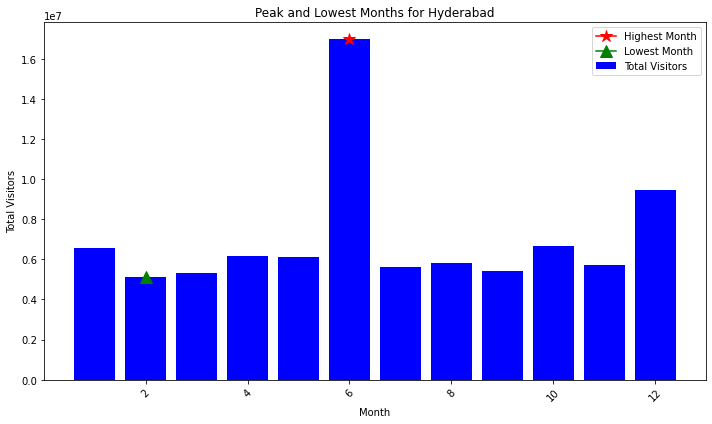

In [122]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total visitors as a bar chart
ax.bar(monthly_visitors['month'], monthly_visitors['total_visitors'], label='Total Visitors', color='blue')

# Find the month with the highest total visitors
highest_month = monthly_visitors.loc[monthly_visitors['total_visitors'].idxmax()]
# Find the month with the lowest total visitors
lowest_month = monthly_visitors.loc[monthly_visitors['total_visitors'].idxmin()]

# Highlight the highest month with a red star marker
ax.plot(highest_month['month'], highest_month['total_visitors'], marker='*', markersize=12, color='red', label='Highest Month')

# Highlight the lowest month with a green triangle marker
ax.plot(lowest_month['month'], lowest_month['total_visitors'], marker='^', markersize=12, color='green', label='Lowest Month')

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Total Visitors')
ax.set_title('Peak and Lowest Months for Hyderabad')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
